In [1]:
from scipy.signal import lfilter
import matplotlib.pyplot as plt
import matplotlib
from statistics import mean
from scipy import integrate
import pandas as pd
from pandas import *
import numpy as np
import statistics
%matplotlib inline

In [2]:
#Acceleration integrator
def find_baseline(channel):
    sum = 0
    for i in range(10000):
        sum += channel[i]
    return sum/10000

conv = 1   # conversion value for voltage

# integrate function
def integrate_accel(channel, Time):
    baseline = find_baseline(channel)
    velocity = np.zeros(np.size(Time))
    running_sum = 0
    for i in range(np.size(Time)-1):
        dv = 0.5*(conv*(channel[i]-baseline)+(channel[i+1]-baseline))*(Time[i+1]-Time[i])
        running_sum += dv
        velocity[i] = running_sum
    velocity[i+1] = running_sum
    return velocity

# pack and convert all the data 
def pack_data(import_file_name):
    # import data using pandas
    col = ['Time', 'Channel A', 'Channel B', 'Channel C','Channel D','Channel E'] # define columns
    data_pd = pd.read_csv(import_file_name, usecols = [0,1,2,3,4,5])     # array in pandas
    # conversion to str list
    time = data_pd['Time'][1:].tolist()
    channel_a = data_pd['Channel A'][1:].tolist()
    channel_b = data_pd['Channel B'][1:].tolist()
    channel_c = data_pd['Channel C'][1:].tolist()
    channel_d = data_pd['Channel D'][1:].tolist()
    channel_e = data_pd['Channel E'][1:].tolist()
    # conversion to float list
    time = [float(i) for i in time]
    channel_a = [float(i) for i in channel_a]
    channel_b = [float(i) for i in channel_b]
    channel_c = [float(i) for i in channel_c]
    channel_d = [float(i) for i in channel_d]
    channel_e = [float(i) for i in channel_e]
    
    channel_a = integrate_accel(channel_a, time)
    channel_b = integrate_accel(channel_b, time)
    channel_c = integrate_accel(channel_c, time)
    channel_d = integrate_accel(channel_d, time)
    channel_e = integrate_accel(channel_e, time)
    
    zeroa = mean(channel_a[20:100])
    zerob = mean(channel_b[20:100])
    zeroc = mean(channel_c[20:100])
    zerod = mean(channel_d[20:100])
    zeroe = mean(channel_e[20:100])
    time = [float("%.2f"%i) for i in time]
    channel_a = [float("%.3f" %(i-zeroa)) for i in channel_a]
    channel_b = [float("%.3f" %(i-zerob)) for i in channel_b]
    channel_c = [float("%.3f" %(i-zeroc)) for i in channel_c]
    channel_d = [float("%.3f" %(i-zerod)) for i in channel_d]
    channel_e = [float("%.3f" %(i-zeroe)) for i in channel_e]
    # pack data
    output_data_pack = [time, channel_a, channel_b, channel_c, channel_d, channel_e]
    return output_data_pack
    # data structure: [time, channel_a, channel_b, channel_c,...]
    
# find the peak
def peakfinder(peak, listy, list_x,list_time,interval0, interval1): # return includes time information 
    #generate interval index
    interval0i = list_time.index(interval0)
    interval1i = list_time.index(interval1)
    if interval0 == interval1:
        if listy[interval0i] == 0:
            listy[interval0i] = 0.05
            return listy[interval0i]
        else:
            return listy[interval0i]
    if peak == "max" and interval0 != interval1:
        maximum = max(np.abs(listy[interval0i:interval1i])) # maximum y value
        if max(np.abs(listy[interval0i:interval1i])) == max(listy[interval0i:interval1i]):
            maximum = maximum
        elif max(np.abs(listy[interval0i:interval1i])) == min(listy[interval0i:interval1i]):
            maximum = min(listy[interval0i:interval1i])
        else:
            maximum = -maximum
        coor = [list_x[listy.index(maximum)],maximum] # both value and time in ms 
        return maximum # maximum & time 
    elif peak == "min":
        minimum = min(listz) # maximum y value
        index_z = [i for i in range(len(listy)) if listy[i] == minimum] # examine maxima index
        coor = [minimum, listx[index_z[0]]]
        return maximum 

In [3]:
# convert and pack all the data from SR experiments
ray5_packx_1    =  pack_data('ray_x_5.csv')
ray5_packy_1    =  pack_data('ray_y_5.csv')
ray8_packx_1    =  pack_data('ray_x_8.csv')
ray8_packy_1    =  pack_data('ray_y_8.csv')
ray10_packx_1   =  pack_data('ray_x_10.csv')
ray10_packy_1   =  pack_data('ray_y_10.csv')
ray12_packx_1   =  pack_data('ray_x_12.csv')
ray12_packy_1   =  pack_data('ray_y_12.csv')

# pack each xy to a single experiment pack
ray5_pack_1    =  [ray5_packx_1,ray5_packy_1 ]
ray8_pack_1    =  [ray8_packx_1,ray8_packy_1]
ray10_pack_1   =  [ray10_packx_1,ray10_packy_1 ]
ray12_pack_1   =  [ray12_packx_1,ray12_packy_1 ]
# data strucuture exp_pack_sequence: [x,y]
# x:[time, channel_a, channel_b, channel_c,...]; y:[time, channel_a, channel_b, channel_c,...]

In [4]:
# template for storing all the positions of accelerometers 
x = [5.5,5.5,5.5,5.5,5.5]
y = [0,-2,-4,-6,-8]
template_ray5 = [x,y]
x = [8,8,8,8,8]
y = [0,-2,-4,-6,-8]
template_ray8 = [x,y]
x = [10,10,10,10,10]
y = [0,-2,-4,-6,-8]
template_ray10 = [x,y]
x = [12,12,12,12,12]
y = [0,-2,-4,-6,-8]
template_ray12 = [x,y]

In [5]:
# calculation of the ray angle
def f_degree(x, y, z, R):
    r = ((x**2)+(y**2))**(0.5)
    theta = 0.5*np.pi - np.arccos(1-(r**2)/(R**2))
    r_1 = ((R*np.cos(theta)*(1-np.sin(theta)))**((3-z)/(z-2))) / (z-2)
    dy_dx = (r_1*np.sin(theta)+r*np.cos(theta)) / (r_1*np.cos(theta)-r*np.sin(theta))
    return np.arctan(dy_dx)
f_degree(5.5, 0, 1.5, 5) # angle check

1.360978408632113

144.0
146.0
148.0
150.0
152.0
154.0
156.0
158.0
160.0
162.0
164.0


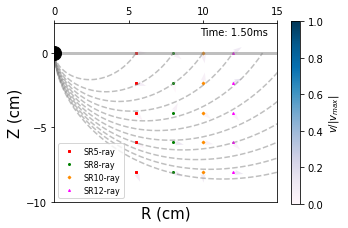

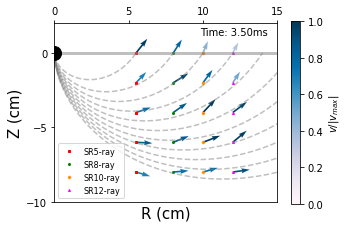

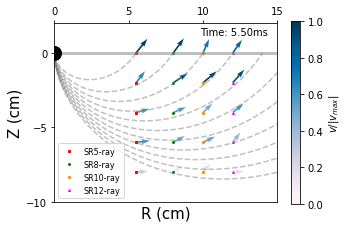

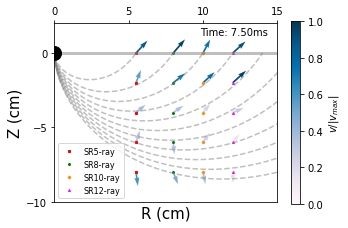

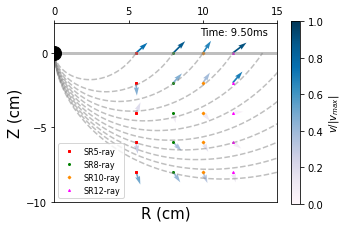

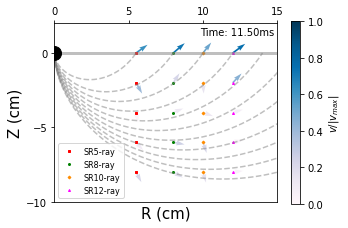

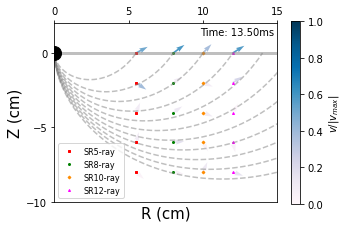

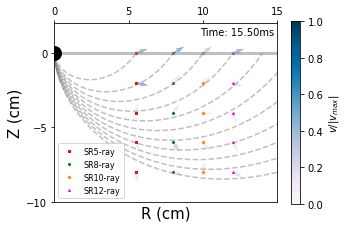

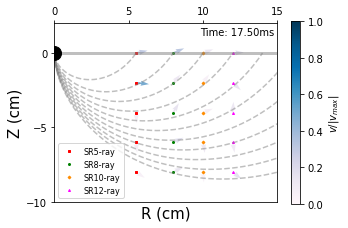

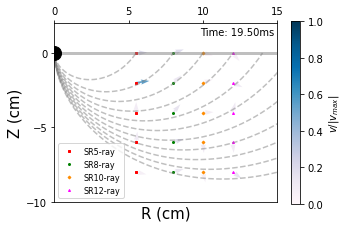

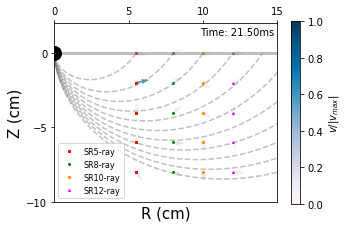

In [6]:
stepsize = 2
k = 144
j = 1
norm = matplotlib.colors.Normalize()
while k>=144.0 and k <=164.0:
    k = float("%.2f" %(k))
    f = k
    ray5_peak_y = []
    for i in range(5):
        ray5_peak_y.append(peakfinder("max", ray5_pack_1[1][i+1], ray5_pack_1[0][i+1],ray5_pack_1[0][0], k, f))
    ray5_peak_x = []
    for i in range(5):
        ray5_peak_x.append(peakfinder("max", ray5_pack_1[0][i+1],\
                                      ray5_pack_1[0][i+1],ray5_pack_1[0][0], k,f))
    ray8_peak_y = []
    for i in range(5):
        ray8_peak_y.append(peakfinder("max", ray8_pack_1[1][i+1], ray8_pack_1[0][i+1],ray8_pack_1[0][0], k, f))
    ray8_peak_x = []
    for i in range(5):
        ray8_peak_x.append(peakfinder("max", ray8_pack_1[0][i+1],\
                                      ray8_pack_1[0][i+1],ray8_pack_1[0][0], k,f))
    ray10_peak_y = []
    for i in range(5):
        ray10_peak_y.append(peakfinder("max", ray10_pack_1[1][i+1], ray10_pack_1[0][i+1],ray10_pack_1[0][0], k, f))
    ray10_peak_x = []
    for i in range(5):
        ray10_peak_x.append(peakfinder("max", ray10_pack_1[0][i+1],\
                                   ray10_pack_1[0][i+1],ray10_pack_1[0][0],k,f))    
    ray12_peak_y = []
    for i in range(5):
        ray12_peak_y.append(peakfinder("max", ray12_pack_1[1][i+1], ray12_pack_1[0][i+1],ray12_pack_1[0][0], k, f))
    ray12_peak_x = []
    for i in range(5):
        ray12_peak_x.append(peakfinder("max", ray12_pack_1[0][i+1],\
                                   ray12_pack_1[0][i+1],ray12_pack_1[0][0],k,f))
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    plt.text(9.8,1.2, 'Time: '+str("%.2f" %(k-142.5))+'ms')
    
    for i in range(5):
        max5x = max(ray5_pack_1[0][i+1])
        max5y = max(ray5_pack_1[1][i+1])
        max8x = max(ray8_pack_1[0][i+1])
        max8y = max(ray8_pack_1[1][i+1])
        max10x = max(ray10_pack_1[0][i+1])
        max10y = max(ray10_pack_1[1][i+1])
        max12x = max(ray12_pack_1[0][i+1])
        max12y = max(ray12_pack_1[1][i+1])
        max5 = ((max5x**2)+(max5y**2))**(0.5)   
        max8 = ((max8x**2)+(max8y**2))**(0.5)
        max10 = ((max10x**2)+(max10y**2))**(0.5)
        max12 = ((max12x**2)+(max12y**2))**(0.5)
        x =  ray5_peak_x[i]
        y =  ray5_peak_y[i]
        mag5 = (((x**2)+(y**2))**(0.5))/(max5)
        x =  ray8_peak_x[i]
        y =  ray8_peak_y[i]
        mag8 = (((x**2)+(y**2))**(0.5))/(max8)
        x =  ray10_peak_x[i]
        y =  ray10_peak_y[i]
        mag10 = (((x**2)+(y**2))**(0.5))/(max10)
        x =  ray12_peak_x[i]
        y =  ray12_peak_y[i]
        mag12 = (((x**2)+(y**2))**(0.5))/(max12)
        
        mag = np.linspace(0,1,100)
        norm.autoscale(mag)
        cm = matplotlib.cm.PuBu
        sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        deg_r5=np.arctan(ray5_peak_y[i]/ray5_peak_x[i])
        deg_r8=np.arctan(ray8_peak_y[i]/ray8_peak_x[i])
        deg_r10=np.arctan(ray10_peak_y[i]/ray10_peak_x[i])
        deg_r12=np.arctan(ray12_peak_y[i]/ray12_peak_x[i])
        plt.quiver(template_ray5[0][i], template_ray5[1][i], np.cos(deg_r5), np.sin(deg_r5), \
                   pivot='tail', color=cm(norm(mag5)),scale = 22-mag5*10)
        plt.quiver(template_ray8[0][i], template_ray8[1][i], np.cos(deg_r8), np.sin(deg_r8), \
                   pivot='tail', color=cm(norm(mag8)),scale = 22-mag8*10)
        plt.quiver(template_ray10[0][i], template_ray10[1][i], np.cos(deg_r10), np.sin(deg_r10), \
                   pivot='tail', color=cm(norm(mag10)),scale = 22-mag10*10)
        plt.quiver(template_ray12[0][i], template_ray12[1][i], np.cos(deg_r12), np.sin(deg_r12), \
                   pivot='tail', color=cm(norm(mag12)),scale = 22-mag12*10)
        

    plt.plot(template_ray5[0],template_ray5[1], 's', color = 'r', markersize=2, label = 'SR5-ray')
    plt.plot(template_ray8[0],template_ray8[1], 'o', color = 'green', markersize=2, label = 'SR8-ray')
    plt.plot(template_ray10[0],template_ray10[1], 'D', color = 'darkorange', markersize=2,label = 'SR10-ray')
    plt.plot(template_ray12[0],template_ray8[1], '^', color = 'magenta', markersize=2,label = 'SR12-ray')
    plt.colorbar(sm,shrink=0.67, label=r'$v / |v_{max}|$')
    theta = np.linspace(0, np.pi, 360)
    def f(theta,target,z):
        return -target*(1-np.cos(0.5*np.pi-theta))**(1/(z-2))
    pos = [5.5,8,10,12,14,16,18,20,22,24,26]
    for i in range(np.size(pos)):
        x = f(theta,pos[i],3.5)*np.cos(theta)
        y = f(theta,pos[i],3.5)*np.sin(theta)
        plt.plot(x,y,'--',color="gray",alpha=0.5)
    x = np.linspace(0,25,100)
    y = np.linspace(0,0,100)
    plt.plot(x,y,"gray",linewidth=3,alpha=0.5)
    x = np.linspace(5.5,5.5,100)
    y = np.linspace(-20,0,100)
    plt.xlim(0,15)
    plt.ylim(-10,2) 
    plt.yticks(np.arange(-10, 5, 5))
    plt.xticks(np.arange(0, 20, 5))
    plt.plot(0, 0, 'o', color = "black",markersize=14)
    ax.xaxis.tick_top()
    plt.legend(loc=3,prop={'size': 8})
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel("R (cm)", fontsize = 15)
    plt.ylabel("Z (cm)", fontsize = 15)
    plt.savefig(f"{j:03d}.png", dpi=400, bbox_inches='tight')
    print(k)
    k += stepsize
    j += 1